<a href="https://colab.research.google.com/github/EastbayML/pytorch_tutorial/blob/master/pytorch_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup the environment

In [0]:
from __future__ import print_function
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import copy
from IPython.core.debugger import set_trace
from IPython.display import clear_output
import math
from mpl_toolkits.mplot3d import Axes3D
from functools import partial



East Bay Machine Learning pytorch tutorial series.

---

We will use this notebook as the launch point for our pytorch tutorial series.


We willl used a google doc as a shared online clipboard. 
https://docs.google.com/document/d/1N-5Ue0rk7g8CImayet-cgnaCkHJzXky7aeHrwUocXEM/edit?usp=sharing


#Agenda
We will be starting with the pytorch.org/tutorials 60 minute blitz and bounce back here occasionally

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

Then we will do a brief exploration of deep learning using pytorch autograd

Then we will jump into pytorch.nn

# but first lets start with a little bit of overview (borrowed)

PyTorch vs TensorFlow
* Dynamic vs Static: Though both PyTorch and TensorFlow work on tensors, the primary difference between PyTorch and Tensorflow is that while PyTorch uses dynamic computation graphs, TensorFlow uses static computation graphs. That being said, with the release of TensorFlow 2.0 there has been a major shift towards eager execution, and away from static graph computation. Eager execution in TensorFlow 2.0 evaluates operations immediately, without building graphs.
* Data Parallelism: PyTorch uses asynchronous execution of Python to implement data parallelism, but with TensorFlow this is not the case. With TensorFlow you need to manually configure every operation for data parallelism.
* Visualization Support: TensorFlow has a very good visualization library called TensorBoard. This visualization support helps developers to track the model training process nicely. PyTorch initially had a visualization library called Visdom, but has since provided full support for TensorBoard as well. PyTorch users can utilize TensorBoard to log PyTorch models and metrics within the TensorBoard UI. Scalars, images, histograms, graphs, and embedding visualizations are all supported for PyTorch models and tensors.
* Model Deployment: TensorFlow has great support for deploying models using a framework called TensorFlow serving. It is a framework that uses REST Client API for using the model for prediction once deployed. On the other hand, PyTorch does not provide a framework like serving to deploy models onto the web using REST Client.
https://hub.packtpub.com/what-is-pytorch-and-how-does-it-work/



# why pytorch


https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/

In the recent Kaggle competition, PyTorch library was used by nearly all of the top 10 finishers.

Some of the key highlights of PyTorch includes:

* Simple Interface: It offers easy to use API, thus it is very simple to operate and run like Python.
* Pythonic in nature: This library, being Pythonic, smoothly integrates with the Python data science stack. Thus it can leverage all the services and functionalities offered by the Python environment.
* Computational graphs: In addition to this, PyTorch provides an excellent platform which offers dynamic computational graphs, thus you can change them during runtime. This is highly useful when you have no idea how much memory will be required for creating a neural network model.

* torch.Tensor - A multi-dimensional array with support for autograd operations like backward(). Also holds the gradient w.r.t. the tensor.
* nn.Module - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
* nn.Parameter - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module.
* autograd.Function - Implements forward and backward definitions of an autograd operation. Every Tensor operation, creates at least a single Function node, that connects to functions that created a Tensor and encodes its history.

https://www.analyticsvidhya.com/blog/2019/09/introduction-to-pytorch-from-scratch/


# Select a device

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


#ENABLE GPU
To enable GPU hardware accelerator, just go to Runtime -> Change runtime type -> Hardware accelerator -> GPU

In [3]:
print("Device is ",device)
x = torch.empty(5, 3)
y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
x = x.to(device)                       # or just use strings ``.to("cuda")``
z = x + y
print(z)
w=z.to("cpu", torch.double)

print("x is cuda ",x.is_cuda)
print("y is cuda ",y.is_cuda)
print("z is cuda ",z.is_cuda)
print("w is cuda ",w.is_cuda)


Device is  cuda
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
x is cuda  True
y is cuda  True
z is cuda  True
w is cuda  False


# Benchmarks
Let's compare execution times for numpy, torch cpu and torch gpu

First setup a convenience function.

In [0]:
import timeit


def benchmark(stmt,*args):
  number=100
  print("Numpy time   {:.6f}s".format(timeit.timeit(partial(stmt,np,*args),number=1000)/number))
  targs=[torch.tensor(arg,device='cpu') for arg in args]
  print("pytorch time {:.6f}s".format(timeit.timeit(partial(stmt,torch,*targs),number=1000)/number))
  targs=[arg.to(torch.device('cuda')) for arg in targs]
  print("gpu time     {:.6f}s".format(timeit.timeit(partial(stmt,torch,*targs),number=1000)/number))


Next write a simple function to be benchmarked for all three types of variables. Notice that the module name 'np' as the first argument will be replaced with 'torch' for the torch benchmarks. The remaining arguments are expected to be numpy tensors and will be converted to torch tensors for the second benchmark and moved to the gpu for the third benchmark.



In [5]:
def stmt(lib,a,b):
  a=lib.sin(a)
  b=lib.sqrt(b)
  c=a+b


a=np.zeros((300,500))
b=np.zeros((300,500))

benchmark(stmt,a,b)


Numpy time   0.013687s
pytorch time 0.018583s
gpu time     0.000856s


# Numpy shares memory with torch in cpu (but not cuda)

In [6]:
a=torch.zeros((1,2))
c=a.cuda()
b=a.numpy()
a[0,1]=1
print("a ",a)
print("b ",b)
print("c ",c)
try:
  d=c.numpy()
except Exception as e:
  print(e)

a  tensor([[0., 1.]])
b  [[0. 1.]]
c  tensor([[0., 0.]], device='cuda:0')
can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


# Now you do one. 
Do a benchmark of an interesting operation and post it on the shared clipboard. Most math ops are supported. 

https://pytorch.org/docs/stable/tensors.html

https://pytorch.org/docs/stable/nn.functional.html

# Plotting with matplotlib


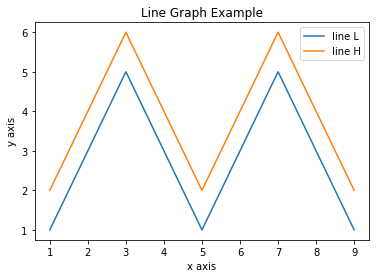

In [7]:
import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

# BTW jupyter had as a debugger

Remove the two comment #s and give it a try

%debug

set_trace

In [8]:
#%debug
def fac(x):
  if x<=1:
    return 1
  #set_trace()
  return x*fac(x-1)
fac(10)

3628800

# Graph vizualization

In [9]:
!pip install torchviz

     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=14301f407797748c540b9ba5a57fb6ddc2cc23795b31338cb8d58bfc6d8bd3e2
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


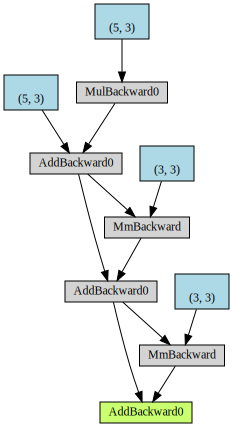

In [10]:
from torchviz import make_dot

x = torch.empty(5, 3,requires_grad=True)
y = torch.empty(5, 3,requires_grad=True)
z = x + y * 10
for l in range(2):
  w=torch.randn((3,3),requires_grad=True)
  z=z.mm(w)+z
make_dot(z)


# Now you do one
* Create an interesting pytorch tensor and post the visualization of the call graph.

# Autograd - Try it out.

[Autograd 60 min blitz](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

[Test a torch function and verify the gradient is correct.](https://pytorch.org/docs/stable/torch.html#math-operations)

[Or use the numerical gradient checking to verify a gradient] (https://pytorch.org/docs/stable/autograd.html#numerical-gradient-checking)



https://pytorch.org/docs/stable/autograd.html

https://pytorch.org/docs/stable/notes/autograd.html

# Defining new autograd functions

https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html

# Deep learning
This is a brief introduction to deep learning using pytorch the autograd feature. While this is a very simple model, the concepts of optimizing a parameterized function are the same as what is used in more complex models.

Once we have a dataset, a model and a loss function defined, we use the autograd feature to move the parameters in a way that reduces the loss for a given training dataset.

# Gradient descent linear regresion example

first create a dataset

In [0]:
# just run on cpu for now
device="cpu"

In [0]:
# Data Generation
def dataset_from_function_with_noise(f,npoints=100,noise=0.1):
  torch.manual_seed(42)
  x_train_tensor = torch.rand(int(npoints*.8),device=device)
  y_train_tensor = f(x_train_tensor)
  y_train_tensor += torch.randn(y_train_tensor.shape)*noise
  return x_train_tensor,y_train_tensor

x_train_tensor,y_train_tensor = dataset_from_function_with_noise(lambda x:1 + 2 * x  )


Now define function that we would like to fit to this data.  We will start with a linear function.

In [13]:
def model(x):
  return model.a+model.b*x
model.a=torch.randn(1)
model.b=torch.randn(1)

print(vars(model))



{'a': tensor([-0.7905]), 'b': tensor([-0.9058])}


# Define gradient descent algorithm.
The gradient descent starts with randomize parameters. Loops through a number of epochs and each loop computes the loss function and the gradient of the loss function with respect to the parameters. Then it adjusts the parameters in a direction that minimizes the loss. It does that by  multiplying the mean of the gradient of the loss function, times a learning rate hyperparameter and adds that to the parameters.

In [0]:

def initializer(model):
  for param in model.params if hasattr(model,'params') else vars(model).values():
    param.requires_grad=False
    torch.randn(param.shape,out=param,requires_grad=True)
    
def gd(model,x_train_tensor,y_train_tensor,lr=1e-1,n_epochs=1000,hook=lambda m,x,y:None,
       initialize=initializer):
  initialize(model)
  hook(model,x_train_tensor,y_train_tensor)
  for epoch in range(n_epochs): 
    single_step(model,x_train_tensor,y_train_tensor,lr=lr)
    hook(model,x_train_tensor,y_train_tensor)

def single_step(model,x_tensor,y_tensor,lr=1e-1,hook=None):
  yhat = model(x_tensor)
  assert yhat.requires_grad,"Model forward lost the requires gradient attribute"
  error = y_tensor - yhat
  loss = (error ** 2).mean()

  # We just tell PyTorch to work its way BACKWARDS from the specified loss!
  with torch.no_grad():
    for param in model.params if hasattr(model,'params') else vars(model).values():
      try:
        param.grad.zero_()
      except:
        pass

  loss.backward()

  # UPDATING the parameters 
  # We need to use NO_GRAD to keep the update out of the gradient computation

  with torch.no_grad():
    for param in model.params if hasattr(model,'params') else vars(model).values():
      param -= lr * param.grad

In [15]:
# now test it
gd(model,x_train_tensor,y_train_tensor)
print(vars(model))

{'a': tensor([1.0328], requires_grad=True), 'b': tensor([1.9635], requires_grad=True)}


# Alternative model
The model we define above is a function with attributes.  Functions are objects in python and this is equivalent to defining an object with a __call__ method and attributes. If you prefer using classes, this is the equivalent definition


In [0]:
class Model:
  def __init__(self):
    self.a=torch.randn(1)
    self.b=torch.randn(1)

  def __call__(self,x):
    return self.a+self.b*x

model=Model()

# visualizing GD
Let's see what the solution looks like as the gradient descent optimizes the parameters.

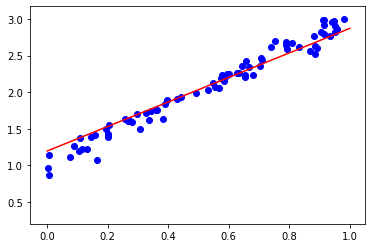

In [17]:
rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()

def movie_hook(model,x_tensor,y_tensor):
  scat=plt.scatter(x_tensor.cpu(),y_tensor.cpu(),c='b')
  l1,=plt.plot(list(rng),list(model(rng)),c='r')
  artists.append([scat,l1])

def plot_hook(model,x_tensor,y_tensor):
  global rng
  plt.scatter(x_tensor.cpu(),y_tensor.cpu(),c='b')
  plt.plot(list(rng),list(model(rng)),c='r')
  plt.pause(0.5)
  clear_output() 
    
torch.manual_seed(42)
gd(model,x_train_tensor,y_train_tensor,hook=movie_hook,n_epochs=100)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 


# Visualizing the loss function
Lets look at the topology of the loss function. Rember that the model output is a function of the input and a set of tunable parameters (a&b).  In the previous graph we plotted the output for a range of inputs for a set of paramters. We varied the parameters over time and visualized the changes to the input/output function.  

In this case we will vary the two parameters a&b over a range and vizualize the mean error of the model for a range of X.  So the plot is a 2d surface, where color represents the log(mean(Y - model(X,(a,b))). 

Notice that the shape is has a sharp gradient in some directions and a low gradient in other directions. This is why we observe that we quickly adjust the parameters at first, but then slowly fine tune the parameters.

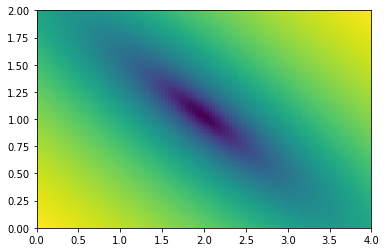

In [18]:

arng=torch.linspace(0,2,100)
brng=torch.linspace(0,4,100)
thetagrid=torch.cat([x.unsqueeze(-1) for x in torch.meshgrid(arng,brng)],dim=-1)

def lossf(model,X,Y,theta):
    saveit=model.a,model.b
    model.a,model.b=theta
    yhat = model(X)
    error = Y - yhat
    loss = (error ** 2).mean()
    model.a,model.b=saveit
    return math.log(loss)

def torchmap(func,grid,argdim=1):
  global thetagrid
  if len(grid.shape)==argdim+1:
    return torch.tensor([func(t) for t in grid])
  else:
    t= torch.cat([torchmap(func,t) for t in thetagrid])
    return t.reshape(thetagrid.shape[:-1])

ax.set_aspect('equal', 'datalim')
plt.pcolor(brng,arng,torchmap(partial(lossf,model,x_train_tensor,y_train_tensor),thetagrid))
plt.show()

# Visualizing GD trajectory over the loss surface

In [0]:
def trajectory_hook(artists,model,grid,X,Y):
  artists.clear()
  trajectory=[]
  #pre compute the background to save time
  background=plt.pcolor(grid[0,:,1],grid[:,0,0],torchmap(partial(lossf,model,X,Y),grid))
  def func(model,X,Y):
    trajectory.append((model.b.item(),model.a.item()))  
    l1,=plt.plot(*zip(*trajectory) ,c='r')
    artists.append([l1,background])

  return func

tensor([1.0761], requires_grad=True) tensor([1.8873], requires_grad=True)


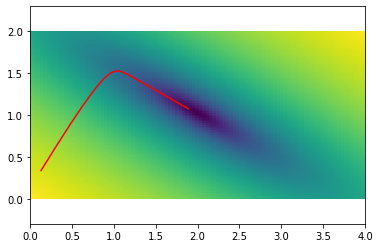

In [20]:
artists=[]
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')
torch.manual_seed(42)
gd(model,x_train_tensor,y_train_tensor,hook=trajectory_hook(artists,model,thetagrid,x_train_tensor,y_train_tensor),n_epochs=200)
print(model.a,model.b)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

# learning rate
What happens if we increase the learning rate?

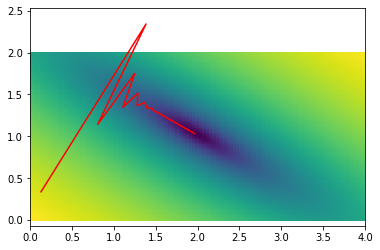

In [21]:

artists=[]
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')

torch.manual_seed(42)
gd(model,x_train_tensor,y_train_tensor,hook=trajectory_hook(artists,model,thetagrid,x_train_tensor,y_train_tensor),n_epochs=200,lr=6e-1)

HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

# Reparameterization

The model parameters can be transformed to make the loss function more bowl shaped and less taco shaped.


In [0]:
def modeln(x):
  a=modeln.a+1-modeln.b*2
  b=modeln.b*4
  return a+b*x
modeln.a=torch.randn(1)
modeln.b=torch.randn(1)


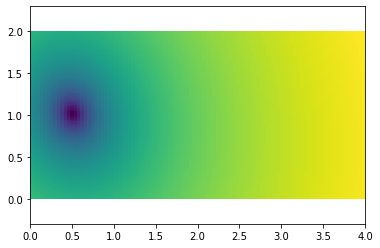

In [23]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim') 


plt.pcolor(brng,arng,torchmap(partial(lossf,modeln,x_train_tensor,y_train_tensor),thetagrid))
plt.show()


Now lets watch the gradient descent on the new model

In [0]:
def fixed_initializer(model,params=None):
  for param,value in zip((model.params if hasattr(model,'params') else vars(model).values()),params):
    with torch.no_grad():
      param.fill_(value)
      param.requires_grad=True

tensor([1.0328], requires_grad=True) tensor([1.9635], requires_grad=True)


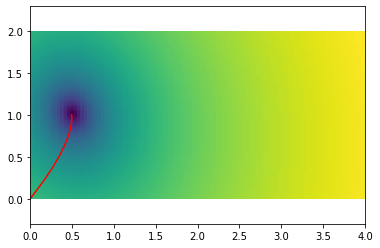

In [25]:
artists=[]
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')

torch.manual_seed(42)
gd(modeln,x_train_tensor,y_train_tensor,hook=trajectory_hook(artists,modeln,thetagrid,x_train_tensor,y_train_tensor),n_epochs=20,
  initialize=partial(fixed_initializer,params=[0,0]))
print(model.a,model.b)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

Now lets watch that in the input and output space (X and Y)

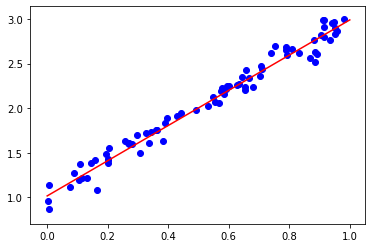

In [26]:
rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()

torch.manual_seed(42)
gd(modeln,x_train_tensor,y_train_tensor,hook=movie_hook,n_epochs=20,initialize=partial(fixed_initializer,params=[0,0]))
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

But does this work for other linear datasets?

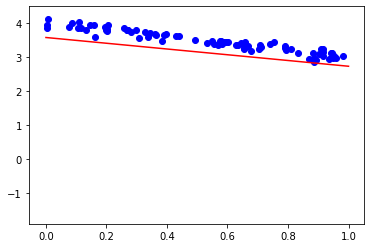

In [27]:
torch.manual_seed(42)
x2_train_tensor,y2_train_tensor = dataset_from_function_with_noise(lambda x:4 - 1 * x  )


rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
gd(modeln,x2_train_tensor,y2_train_tensor,hook=movie_hook,n_epochs=10)
HTML(animation.ArtistAnimation(fig, artists,interval=150, blit=True,repeat_delay=1000).to_html5_video()) 


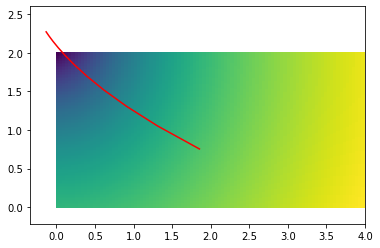

In [28]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim') 
artists=[]
torch.manual_seed(60)
gd(modeln,x2_train_tensor,y2_train_tensor,hook=trajectory_hook(artists,modeln,thetagrid,x2_train_tensor,y2_train_tensor),n_epochs=10)
HTML(animation.ArtistAnimation(fig, artists,interval=150, blit=True,repeat_delay=1000).to_html5_video()) 

# Stochastic Gradient Descent
Technically what we have done so far is not stochastic gradient descent because for every a&b we evaluate the loss function for all values of the training data set.  Stochastic Gradient Descent computes the loss function for a subset of the data and then updates the parameters based on the gradient. So let't define sgd() and see if we get the same answer.

In [0]:
def sgd(model,x_train_tensor,y_train_tensor,batchsize=32,lr=1e-1,n_epochs=100,hook=lambda m,x,y:None,
        initialize=initializer):
  initialize(model)
  for epoch in range(n_epochs):
    for batch in range(int(n_epochs/batchsize)+1):
      rows = torch.randperm(x_train_tensor.shape[0])[:batchsize]
      single_step(model,x_train_tensor[rows],y_train_tensor[rows])
    hook(model,x_train_tensor,y_train_tensor)

In [30]:
sgd(model,x_train_tensor,y_train_tensor)
print(vars(model))

{'a': tensor([1.0382], requires_grad=True), 'b': tensor([1.9517], requires_grad=True)}


# now lets visualize SGD

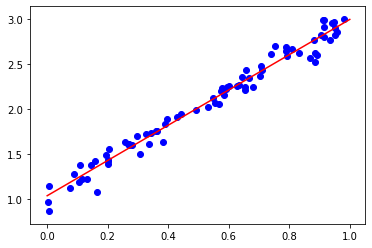

In [31]:

rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
torch.manual_seed(42)
sgd(model,x_train_tensor,y_train_tensor,hook=movie_hook,n_epochs=100,lr=1e-1)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

Now lets visualize SGD in parameter space

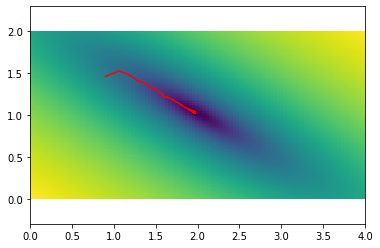

In [32]:
artists=[]
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')
torch.manual_seed(42)
sgd(model,x_train_tensor,y_train_tensor,hook=trajectory_hook(artists,model,thetagrid,x_train_tensor,y_train_tensor),n_epochs=200)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

# How do minibatches change the loss function surface?


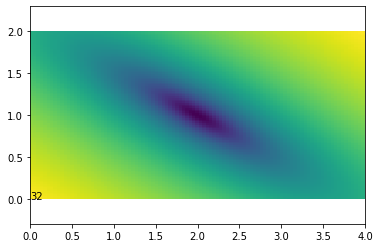

In [55]:
from matplotlib.text import Text 
artists=[]
fig, ax = plt.subplots()
ax.set_aspect('equal', 'datalim')
model.a=1
model.b=2
batchsize=32
for batch in range(20):
  rows = torch.randperm(x_train_tensor.shape[0])[:batchsize]
  txt = plt.text(0,0,str(batchsize) )
  background=plt.pcolor(thetagrid[0,:,1],thetagrid[:,0,0],torchmap(partial(lossf,model,x_train_tensor[rows],y_train_tensor[rows]),thetagrid))
  artists.append([background,txt])

HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

# deep learning models 
often use layers of linear and nonlinear functions with hidden activation layers. Lets try that now.



we need to change some of our utility functions to work with tensors instead of scalars


In [0]:
# Data Generation
def vector_dataset_from_function_with_noise(f,npoints=100,noise=0.1):
  torch.manual_seed(42)
  x_train_tensor = torch.rand((int(npoints*.8),1),device=device)
  y_train_tensor = f(x_train_tensor)
  y_train_tensor += torch.randn(y_train_tensor.shape)*noise
  return x_train_tensor,y_train_tensor


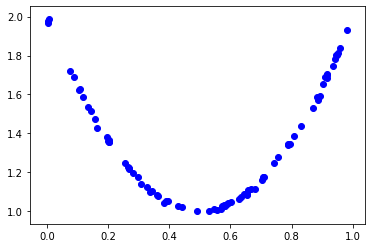

In [35]:
xv_train_tensor,yv_train_tensor = vector_dataset_from_function_with_noise(lambda x:1 + 4 * (x-0.5)**2,noise=0.01 ,npoints=100 )
plt.scatter(xv_train_tensor,yv_train_tensor,c='b')
plt.show()

# Our deep model
Now define a model with multiple weighted linear segments

In [0]:
def modelv(x):
  if len(x.shape)==1:
    x=x.unsqueeze(-1)
  modelv.x=x
  modelv.h1 = modelv.w1.mm(x.T).T +modelv.b1
  modelv.a1 = torch.relu(modelv.h1)
  modelv.h2 = modelv.w2.mm(modelv.a1.T).T+modelv.b2
  return modelv.h2
hl=10
modelv.w1=torch.randn((hl,1))
modelv.b1=torch.randn((hl))
modelv.w2=torch.randn((1,hl))
modelv.b2=torch.randn((1,))
modelv.params=[modelv.w1,modelv.b1,modelv.w2,modelv.b2]

Now train the model

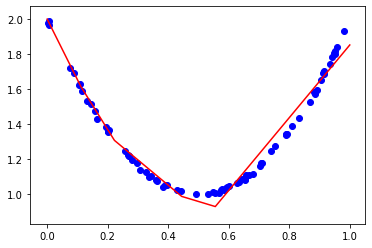

In [37]:

rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
torch.manual_seed(42)  # converged
#torch.manual_seed(60)   # doesnt converge
sgd(modelv,xv_train_tensor,yv_train_tensor,hook=movie_hook,n_epochs=300,lr=1e-2)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

# initialization matters
In my tests, the sgd only converges occasionally. I assume this is because of the random parameter values.

Also, I noticed that it will not converge with gd()

In [49]:
with torch.no_grad():
  torch.manual_seed(42)
  initializer(modelv)
  print(torch.mean(modelv.w1),torch.mean(modelv.b1),torch.mean(modelv.w2))
  torch.manual_seed(60)
  initializer(modelv)
  print(torch.mean(modelv.w1),torch.mean(modelv.b1),torch.mean(modelv.w2))


tensor(0.1920) tensor(0.1357) tensor(0.3605)
tensor(0.6873) tensor(0.6233) tensor(-0.3898)


# Parameter trajectory
Because the parameter space is high dimensionality, we cannot plot parameter trajectory over the loss surface, but we can plot the trajectory in time.

In [0]:
from collections import defaultdict
def hooks(hs,m,x,y):
  for hook in hs:
    hook(m,x,y)

def recording_hook(md,m,x,y):
  for name,value in vars(m).items():
    if torch.is_tensor(value):
      md[name].append(value.clone())
      if value.requires_grad and value.grad is not None:
        md[name+".grad"].append(value.grad.clone())

def recorder2tensor(recorder):
  ret={}
  for name in recorder:
    tl=[t.detach().numpy() for t in recorder[name]]
    if len(tl[0].shape)==2:
      if tl[0].shape[1]==1:
        v=np.hstack(tl)  
      elif tl[0].shape[0]==1:
        v=np.hstack([t.detach().numpy().T for t in recorder[name]])
      else:
        v=np.hstack([t.detach().numpy().T for t in recorder[name]])[:,::10]     
    elif len(tl[0].shape)==1:
      v=np.hstack([np.expand_dims(t.detach().numpy(), axis=-1) for t in recorder[name]])
    else:
      assert "unexpected shape".format(tl[0].shape) 
    ret[name]=v
  return ret

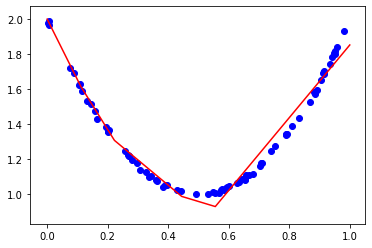

In [40]:

rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
torch.manual_seed(42)  # converged
#torch.manual_seed(60)   # doesnt converge
recorder=defaultdict(list)
sgd(modelv,xv_train_tensor,yv_train_tensor,hook=partial(hooks,[movie_hook,partial(recording_hook,recorder)]),n_epochs=300,lr=1e-2)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

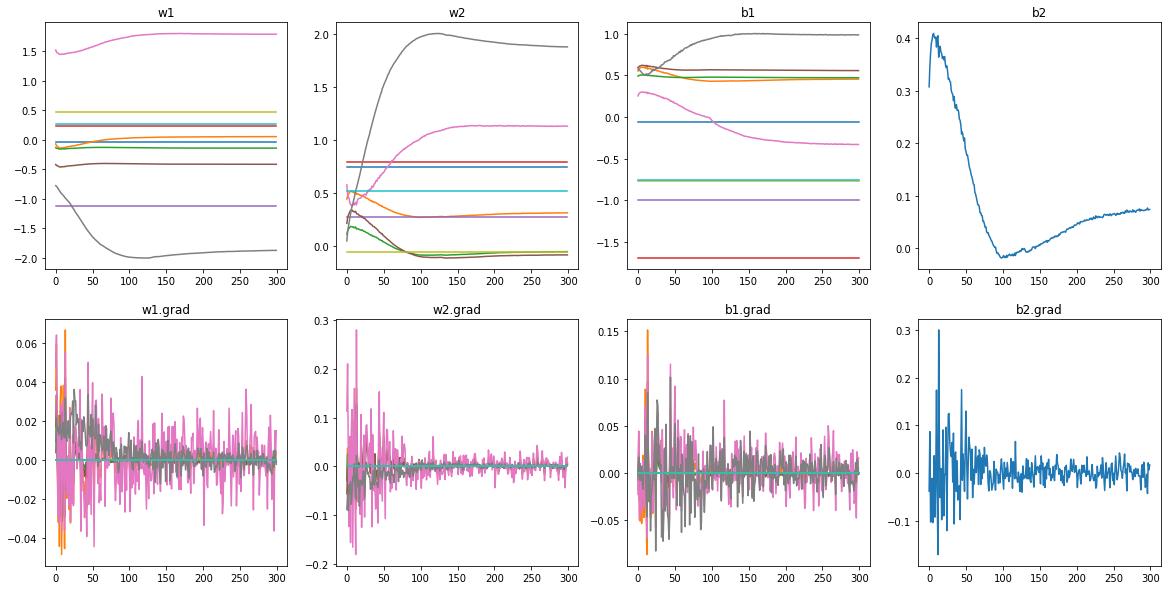

In [41]:
import time
import numpy as np

results=recorder2tensor(recorder)
def pltresults(results):
  fig= plt.figure(figsize=(20,10))
  for idx,trace in enumerate( ['w1','w2','b1','b2','w1.grad','w2.grad','b1.grad','b2.grad']):
    c='r' if '2' in trace else 'b'
    plt.subplot(2,4,idx+1)
    for l in results[trace]:
      plt.title(trace)
      plt.plot(l)
  plt.pause(1)

pltresults(results)


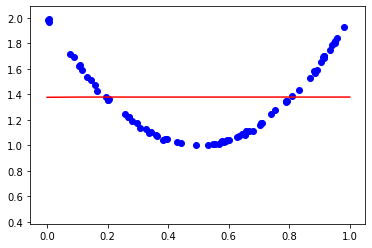

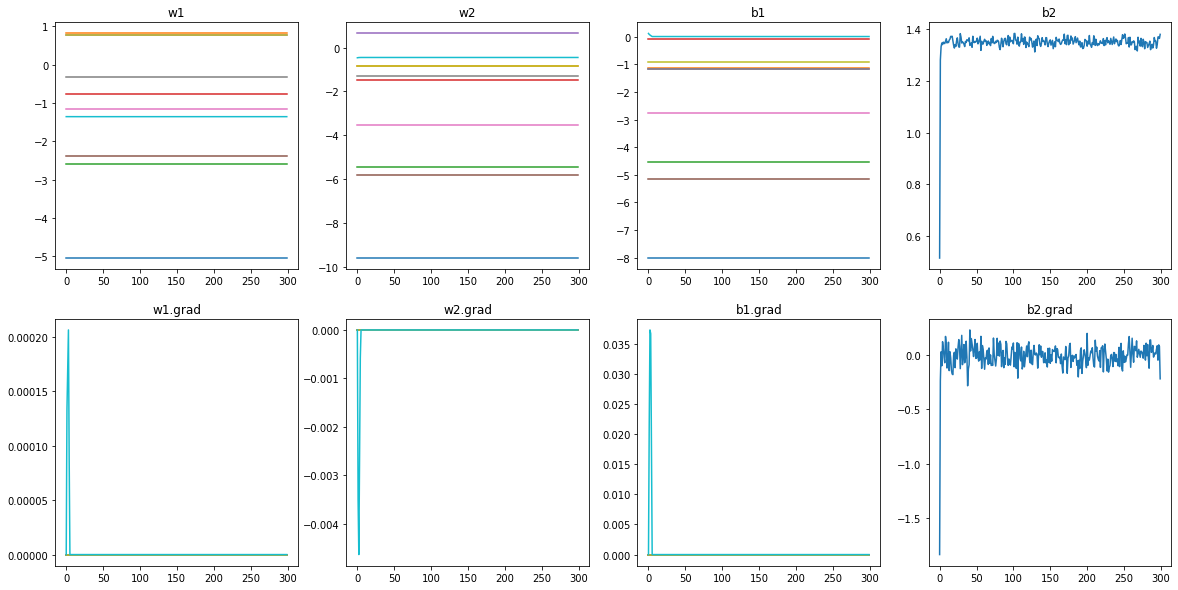

In [42]:
rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
torch.manual_seed(60)   # doesnt converge
recorder=defaultdict(list)
sgd(modelv,xv_train_tensor,yv_train_tensor,hook=partial(hooks,[movie_hook,partial(recording_hook,recorder)]),n_epochs=300,lr=1e-2)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 

results=recorder2tensor(recorder)
pltresults(results)

In [0]:
def modelv(x):
  if len(x.shape)==1:
    x=x.unsqueeze(-1)
  modelv.x=x
  modelv.h1 = modelv.w1.mm(x.T).T +modelv.b1
  modelv.a1 = torch.functional.F.leaky_relu(modelv.h1,negative_slope=0.1)
  modelv.h2 = modelv.w2.mm(modelv.a1.T).T+modelv.b2
  return modelv.h2
hl=10
modelv.w1=torch.randn((hl,1))
modelv.b1=torch.randn((hl))
modelv.w2=torch.randn((1,hl))
modelv.b2=torch.randn((1,))
modelv.params=[modelv.w1,modelv.b1,modelv.w2,modelv.b2]

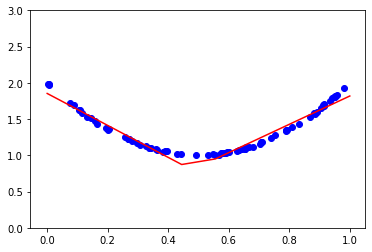

In [44]:
rng=torch.linspace(0,1,10)
artists=[]
fig, ax = plt.subplots()
torch.manual_seed(60)   # doesnt converge with relu
recorder=defaultdict(list)
plt.ylim(0,3)
sgd(modelv,xv_train_tensor,yv_train_tensor,hook=partial(hooks,[movie_hook,partial(recording_hook,recorder)]),n_epochs=200,lr=1e-2)
HTML(animation.ArtistAnimation(fig, artists,interval=50, blit=True,repeat_delay=1000).to_html5_video()) 



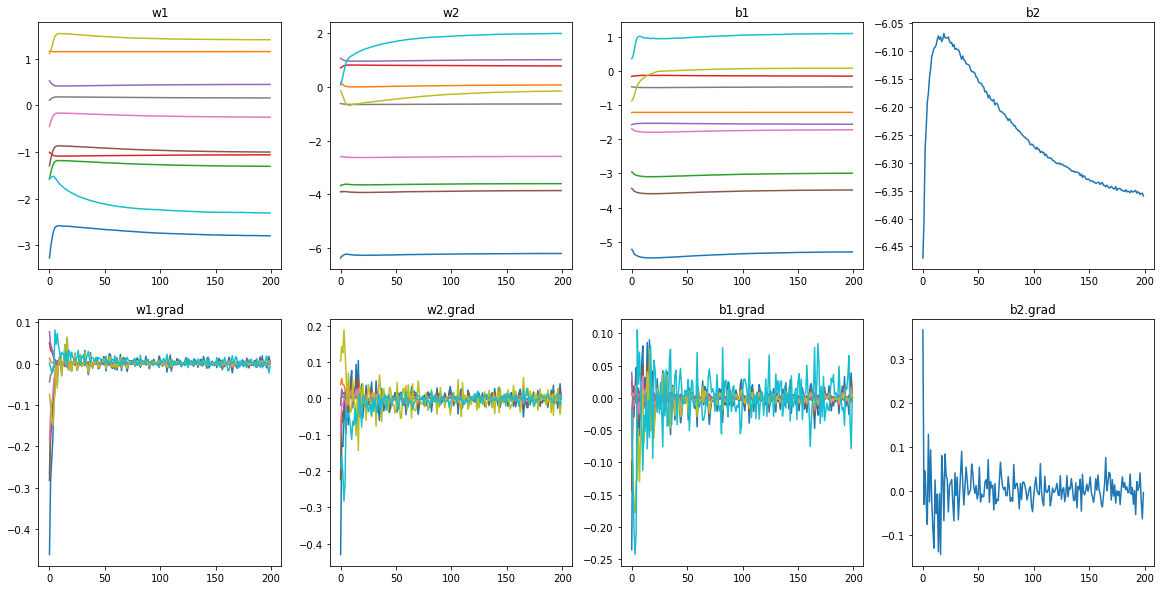

In [45]:
results=recorder2tensor(recorder)
pltresults(results)

# Question

Why doesnt the linear model above use all of the hidden layer activations to make a closer fit?

* I tried 3000 epoch and it never improved

## Links and stuff


In [46]:
#%debug
def fac(x):
  if x<=1:
    return 1
  #set_trace()
  return x*fac(x-1)
fac(10)

3628800


https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/


https://hub.packtpub.com/what-is-pytorch-and-how-does-it-work/

https://pytorch.org/docs/master/named_tensor.html
https://en.wikipedia.org/wiki/Automatic_differentiation
https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html
https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/module.py
https://www.analyticsvidhya.com/blog/2019/09/introduction-to-pytorch-from-scratch/




![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/09/dynamic_graph.gif)